In [71]:
# Importing the necessary modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import model_selection, cluster, preprocessing, datasets

In [72]:
# Loading the dataset

dataset = datasets.load_iris()
print(dir(dataset))

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']


In [73]:
# Creating the dataframe

df = pd.DataFrame(dataset.data, columns = dataset.feature_names)
df.drop(['petal length (cm)', 'petal width (cm)'], axis = 1, inplace = True)
df.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


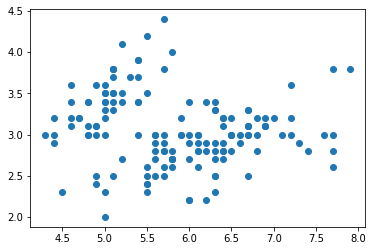

In [74]:
# Visualizing the data

plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'])
plt.show()

In [75]:
# Scaling the features

scaler = preprocessing.MinMaxScaler()
scaler.fit(df[['sepal length (cm)']])
df['sepal length (cm)'] = scaler.transform(df[['sepal length (cm)']])

scaler.fit(df[['sepal width (cm)']])
df['sepal width (cm)'] = scaler.transform(df[['sepal width (cm)']])

df.head()

,sepal length (cm),sepal width (cm)
0,0.222222,0.625000
1,0.166667,0.416667
2,0.111111,0.500000
3,0.083333,0.458333
4,0.194444,0.666667


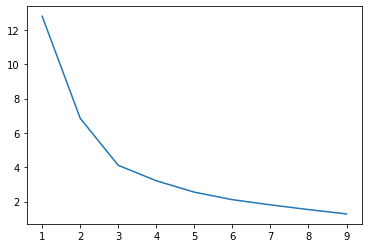

In [76]:
# Determining the value of 'k' using elbow-plot

sse = []
for i in range(1, 10):
    km = cluster.KMeans(n_clusters = i)
    km.fit(df[['sepal length (cm)', 'sepal width (cm)']])
    sse.append(km.inertia_)
plt.plot(range(1, 10), sse)  # elbow at k = 3
plt.show()

In [77]:
# Fitting the model and making predictions

X = df.values

model = cluster.KMeans(n_clusters = 3)

predicted = model.fit_predict(X)  # Assigns labels to indiviudal clusters
print(predicted)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 2 0 0 0 0 0 0 0 0 1 1 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2
 1 1 1 1 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 2 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


In [78]:
df['cluster'] = predicted
df.head()

,sepal length (cm),sepal width (cm),cluster
0,0.222222,0.625000,0
1,0.166667,0.416667,0
2,0.111111,0.500000,0
3,0.083333,0.458333,0
4,0.194444,0.666667,0


[[0.19897959 0.60459184]
 [0.69562648 0.45390071]
 [0.40483539 0.28009259]]


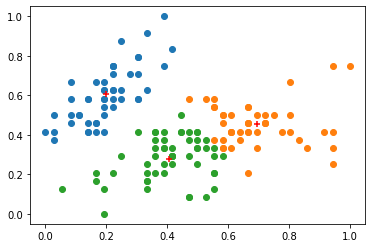

In [80]:
# Visualizing the clusters

df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'])
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'])
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'])

print(model.cluster_centers_)
plt.scatter(model.cluster_centers_[0][0], model.cluster_centers_[0][1], marker = "+", color = "red")
plt.scatter(model.cluster_centers_[1][0], model.cluster_centers_[1][1], marker = "+", color = "red")
plt.scatter(model.cluster_centers_[2][0], model.cluster_centers_[2][1], marker = "+", color = "red")

plt.show()